In [1]:
# loading necessary packages
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_root_path = './../../course_images/'

# Correlation vs Convolution

![image3.png](images/3.png)

If we applied a Gaussian filter, cross-correlation or convoltuion will end up with the same result. (Gaussian is symmetric)

# Properties of convolution

* Linear & Shift Invariant
* Commutative ($f*g = g*f$)
* Associative ($(f*g)*h = f*(g*h)$)
* Identity (unit impulse $e = [...,0,0,1,0,0,...], f * e = f$)

# Exploring Edge Options

320 400


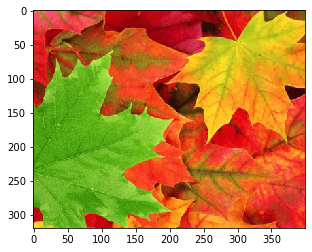

In [16]:
# load an image
img = cv2.imread(img_root_path + 'fall-leaves.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_height = img.shape[0]
img_width = img.shape[1]
print(img_height, img_width)
plt.imshow(img)
plt.show()

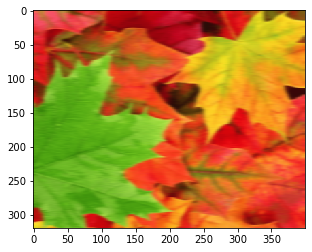

In [30]:
# create a Gaussian filter
filter_size = 21*21
filter_sigma = 3

g_filter = cv2.getGaussianKernel(filter_size, filter_sigma)
g_filter = g_filter.reshape(21,21)
result = cv2.filter2D(img, -1, g_filter)

plt.imshow(result)
plt.show()

# Sharpening an image with a filter

In [37]:
# create a sharpening filter
filt1 = np.array([[0,0,0], [0,2,0], [0,0,0]])
filt2 = (1/9) * np.ones(9).reshape(3,3)
sharp_filt = filt1 - filt2

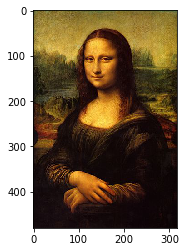

In [39]:
img = cv2.imread(img_root_path + 'mona-lisa.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

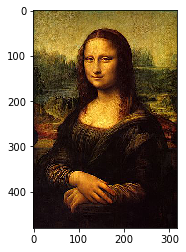

In [40]:
# Apply a filter to the original image
sharp_image = cv2.filter2D(img, -1, sharp_filt)
plt.imshow(sharp_image)
plt.show()

This filter works because I am essentially subtracting the blurry part of the image

# Median Filter (non-linear)

500 469


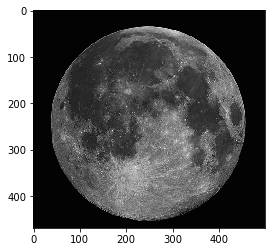

In [68]:
moon_img = cv2.imread(img_root_path + 'moon.png', cv2.IMREAD_GRAYSCALE)
img_height = moon_img.shape[0]
img_width = moon_img.shape[1]
print(img_width, img_height)
plt.imshow(moon_img, cmap='gray', vmin=0, vmax=255)
plt.show()

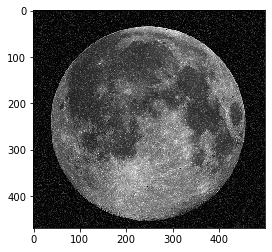

In [69]:
sap_mtrx = np.empty((img_height,img_width), np.uint8)
sap_noise = cv2.randn(sap_mtrx,(0),(25))

# add the noise to the image
noisy_moon_img = moon_img + sap_noise
plt.imshow(noisy_moon_img, cmap='gray', vmin=0, vmax=255)
plt.show()

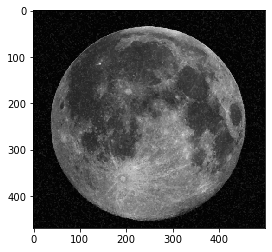

In [76]:
median_filtered_moon_img = cv2.medianBlur(noisy_moon_img,3)
plt.imshow(median_filtered_moon_img, cmap='gray', vmin=0, vmax=255)
plt.show()